# Image classification with Vanilla CNN architecture
In this nothbook, an attempt was made to build an  image classifer with classic vanilla CNN architectue on standard CIFAR-10 dataset. Tensorflow and keras libraries were used to construct the model and traied model with a kaggle gpu for rapid training.
## Introduction:
The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images.This is a classification problem with 10 classes(muti-label    classification). We can take a view on this image for more comprehension of the dataset.

This image taken from the CIFAR repository.
(https://www.cs.toronto.edu/~kriz/cifar.html). I have loaded this dataset from keras datasets for this classification problem.

## Loading and Preprocessing data:

In [ ]:

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd


With above piece of code all the required libraries were imported for dataset loading and preprocessing.

In [ ]:
# loading dateset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Checking loaded data
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)


Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


All right! Both the training and testing sets are ready for preprocessing.
Before procceding furthur lets have a look at images from traing set.
This image shows various classes in the dataset.

![1_6qJdPhPfO0ag_45PT4i5SQ.png](attachment:1_6qJdPhPfO0ag_45PT4i5SQ.png)


Sneak peaking into the traing set with this piece of code given below.

In [ ]:
# This piece of code shows a random images and labels for given set of inputs

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return


In this dataset, total 10 classes are presents whose labels are taken as an array. This categoical classes are maped with numeric label in the dataset. labels array is going tobe useful for mapping y labels with there classes.

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

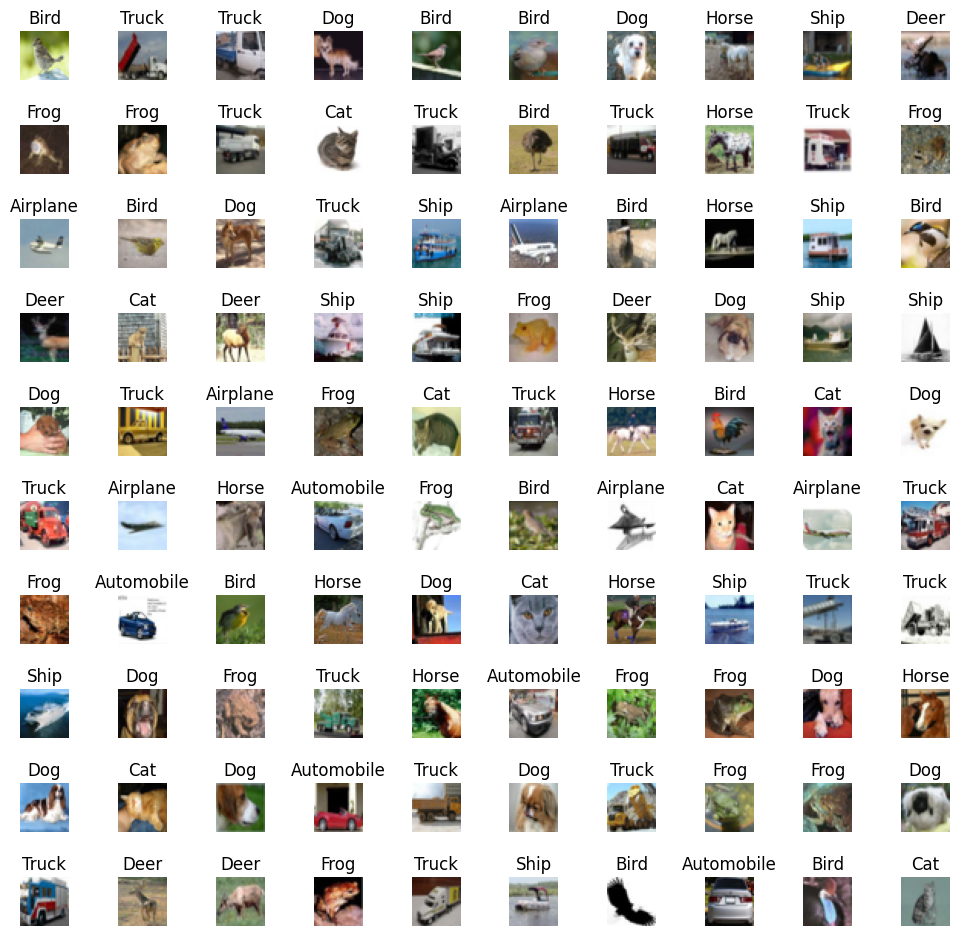

In [ ]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)


#### Preprocessing data:
Now we have to prepare the data for fiting into the convoultional neural network. First step is to convert the data's data type to float32 and second have to normailize it by dividing pixel value of 255. later,implement one hot encoding to y labels to get a (m, class) array. m - is number of images

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255


In [ ]:
#keras.utils.to_cotegorical(y, num_of_classes) convert the label
#data into (m, num_of class) array from (m, 1) input
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


## Building Vanila CNN architecure

![cnn.png](attachment:cnn.png)

Above figure gives the details of the architecure we are building here. Input image is of (32 x 32 x 3) and output is a (1,10) array for single image. Network consts of two blocks of 2 conv_layers followed by maxPool_layer, and dropout_layer. After, that ouput is flattened out and passed through dropout layer followed by fully connected layer with sigmoid activation. Relu activation is used in all convlayers except in the last output layer. let's began the coding with importing libraries required.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
#Building model computational graph
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Description about parameters and layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

### Training The Model



In [ ]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [ ]:
# fitting the model for training dataset
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 20, validation_split = 0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3447 - loss: 1.7925 - val_accuracy: 0.5956 - val_loss: 1.1518
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5979 - loss: 1.1227 - val_accuracy: 0.6616 - val_loss: 0.9683
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6754 - loss: 0.9134 - val_accuracy: 0.6921 - val_loss: 0.8984
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7326 - loss: 0.7603 - val_accuracy: 0.7325 - val_loss: 0.7768
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7655 - loss: 0.6658 - val_accuracy: 0.7539 - val_loss: 0.7027
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8036 - loss: 0.5546 - val_accuracy: 0.7634 - val_loss: 0.6883
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8279 - loss: 0.4814 - val_accuracy: 0.7513 - val_loss: 0.7413
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8553 - loss: 0.4142 - val_accuracy:

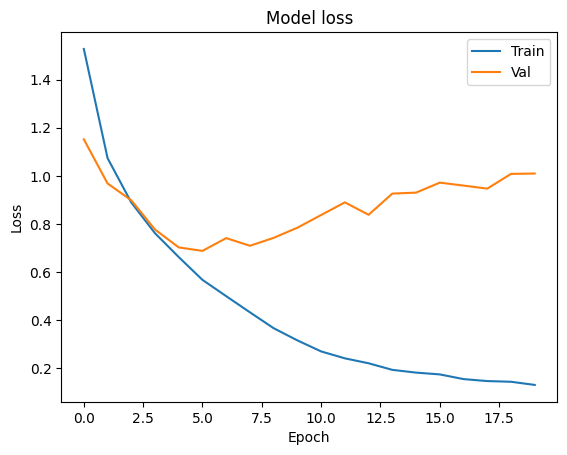

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


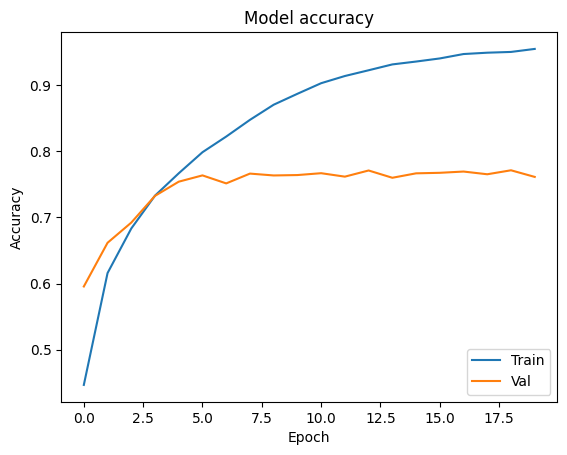

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7532 - loss: 1.0293


0.753000020980835

In [ ]:
!pip install tensorflow scikeras

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
# Import KerasClassifier from scikeras.wrappers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical # Import to_categorical

# Function to create the VGG-16 model with adjustable parameters
def create_vgg16_model(learning_rate=0.001, dropout_rate=0.5, n_nurons=128): # Add n_nurons as an argument
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(n_nurons, activation='relu')(x) # Use n_nurons here
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model for Scikit-learn compatibility
# Pass model-specific parameters to the KerasClassifier constructor
vgg16_classifier = KerasClassifier(model=create_vgg16_model, verbose=1, learning_rate=0.001, dropout_rate=0.5) # Use 'model' instead of 'build_fn'


# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001],
    'dropout_rate': [0.3,],
    'batch_size': [64],
    'epochs': [10],
    'model__n_nurons': [128,] # Use 'model__' prefix for model parameters
    # 'model__learning_rate': [0.001, 0.0001],  # Use 'model__' prefix for model parameters
    # 'model__dropout_rate': [0.3, 0.5],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=vgg16_classifier, param_grid=param_grid, cv=3)
# Convert y_train to one-hot encoding using to_categorical
y_train_one_hot = to_categorical(y_train)
grid_result = grid_search.fit(x_train, y_train_one_hot) # Fit with one-hot encoded y_train

# Output the best parameters and results
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1010 - loss: 2.3139
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1032 - loss: 2.3028
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1065 - loss: 2.3025
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1017 - loss: 2.3026
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1020 - loss: 2.3027
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1036 - loss: 2.3025
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1025 - loss: 2.3026
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1024 - loss: 2.3026
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1016 - loss: 2.3027
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1044 - loss: 2.3025
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4219 - loss: 